# Data Science Salary Analysis

Data Science Salary Analysis project! In this analysis, we delve into the world of data science salaries to gain insights into the factors that influence compensation in this field. Whether you're a seasoned data scientist looking to benchmark your earnings or someone considering a career in data science, this analysis aims to provide valuable insights into salary trends and drivers.

## Dataset

The dataset used in this analysis comprises anonymized data on data science salaries collected from various sources, including surveys, job postings, and public records. It includes information on salary, education level, years of experience, job title, location, and more. By analyzing this dataset, we aim to uncover patterns and insights that can help professionals make informed decisions regarding their careers and organizations optimize their hiring and compensation strategies.


## Column Description

| Column Name       | Description                                                                                         |
|-------------------|-----------------------------------------------------------------------------------------------------|
| work_year         | The year in which the data was recorded. Indicates the temporal context of the data.                |
| job_title         | The specific title of the job role, such as 'Data Scientist', 'Data Engineer', or 'Data Analyst'.   |
| job_category      | A classification of the job role into broader categories like 'Data Analysis', 'Machine Learning', etc. |
| salary_currency   | The currency in which the salary is paid, such as USD, EUR, etc.                                    |
| salary            | The annual gross salary of the role in the local currency.                                           |
| salary_in_usd    | The annual gross salary converted to United States Dollars (USD).                                    |
| employee_residence| The country of residence of the employee. Used for geographical salary differences and cost-of-living variations. |

## Analysis Overview

Our analysis will be divided into several key sections:

- Exploratory Data Analysis (EDA): We will start by exploring the dataset to understand its structure, distributions, and relationships between variables.
- Salary Distribution: We will examine the distribution of salaries across different demographics such as education level, experience, job title, and location.
- Factors Affecting Salary: We will identify and analyze the factors that influence data science salaries, including education, experience, location, and specific skills.
- Salary Prediction: Using machine learning techniques, we will build models to predict data science salaries based on various features.
- Conclusion and Recommendations: Finally, we will summarize our findings and provide recommendations for individuals and organizations based on our analysis.


# Data importing and Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\benzz\Downloads\Streamlit\jobs_in_data.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


### Key Observations
No missing values in any column.
Most features are categorical (object type) except for year and salary data.

Salary is provided both in original currency and standardized to USD, which is helpful for global comparisons.

Fields like experience_level, employment_type, and work_setting allow for rich filtering and analysis.

In [7]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


### Key Insights
Most of the data is from 2023.

Average salary (in USD) is around $150,000, with most salaries falling between $105,700 and $186,723.

There are a few very high salaries that pull up the average — typical in tech-related fields.

This supports what was seen in your visualizations: right-skewed salary distribution and concentration in recent years.

### Checking the missing values:

In [10]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

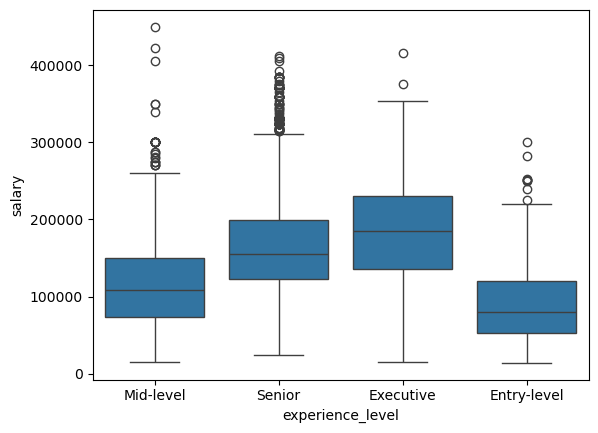

In [12]:
#Salary analysis
#Salary based on experience

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='experience_level', y ='salary', data =df)
plt.show()


### What the chart tells us:
## Entry-level

Lowest salaries overall.

Median salary is the lowest among all groups.

Lots of outliers, meaning a few entry-level jobs still pay really well.

## Mid-level

Median salary is higher than entry-level.

A wider salary range, some mid-level roles pay very well.

## Senior

Even higher median salary than mid-level.

Many outliers at the top — senior roles can be highly paid.

## Executive

Has the highest salaries overall.

The widest box, meaning a large variation in salaries.

Highest top-end salaries among all groups.

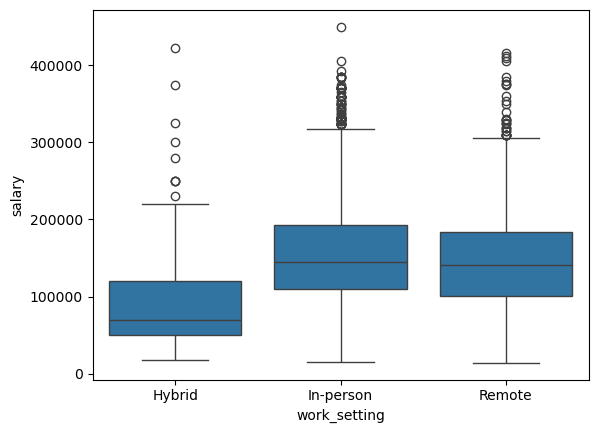

In [13]:
#Salary based on residence

sns.boxplot(x = 'work_setting', y ='salary', data = df)
plt.show()

### What the Boxplot Tells Us:
### Hybrid Workers

Have the lowest median salary.

Most salaries are in a lower range.

Some outliers earn high, but overall it’s lower than others.

### In-person Workers

Higher median salary than hybrid.

Has a wider range, meaning more variation in pay.

Some outliers go above $400,000.

### Remote Workers

Similar to in-person in both median and range.

Slightly higher median salary than hybrid.

Many high-earning outliers — remote jobs can pay well!

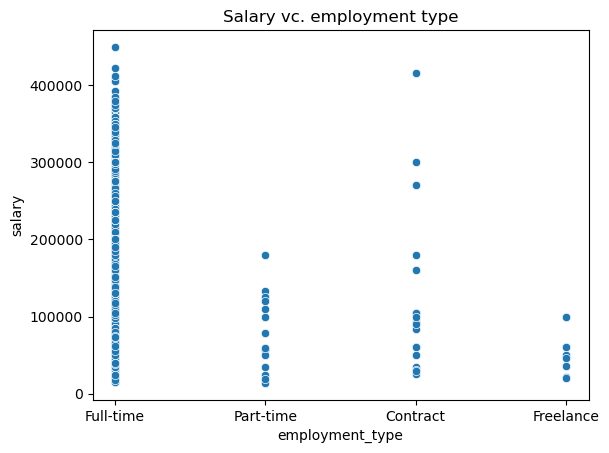

In [14]:
#Scatter Plot for relationship between salary and other factors

sns.scatterplot(x= 'employment_type', y ='salary', data=df)
plt.title('Salary vc. employment type')
plt.show()

### What the Chart Tells Us:
### Full-time

Most salaries are here.

Huge range — from low salaries up to over $450,000.

Highest paying jobs are full-time.

### Part-time

Much lower salary range overall.

Very few people make above $150,000.

Most salaries cluster below $100,000.

### Contract

Wider range than part-time or freelance.

Some contracts pay very well — up to $400,000+.

Shows potential for high pay, but also more variability.

### Freelance

Salaries are mostly low to mid-range.

Most dots are below $100,000.

Less variation compared to other types.

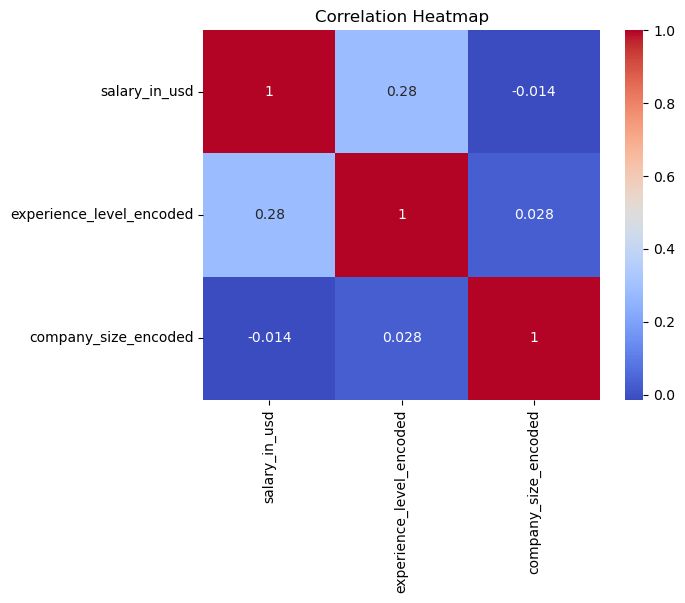

In [18]:
#Correlation heatmap
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])
df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])


corr_matrix = df[['salary_in_usd', 'experience_level_encoded', 'company_size_encoded']].corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Variables:
salary_in_usd: The annual salary in USD.

experience_level_encoded: Coded version of experience level (e.g., entry-level = 0, mid-level = 1, etc.).

company_size_encoded: Coded version of company size (e.g., small = 0, medium = 1, etc.).

### What the Numbers Mean:
Range: Correlation values range from -1 to 1:

+1: Strong positive relationship (as one goes up, the other does too).

-1: Strong negative relationship (as one goes up, the other goes down).

0: No relationship.

### Interpretations:
Salary vs Experience Level (0.28)

A moderate positive correlation.

This means: More experience generally leads to higher salaries.

### Salary vs Company Size (-0.014)

Very close to zero → no real correlation.

This suggests:  Company size doesn't strongly affect salary in this dataset.

### Experience Level vs Company Size (0.028)

Also very weak, almost no correlation.

Indicates: Experience level is not strongly tied to company size.

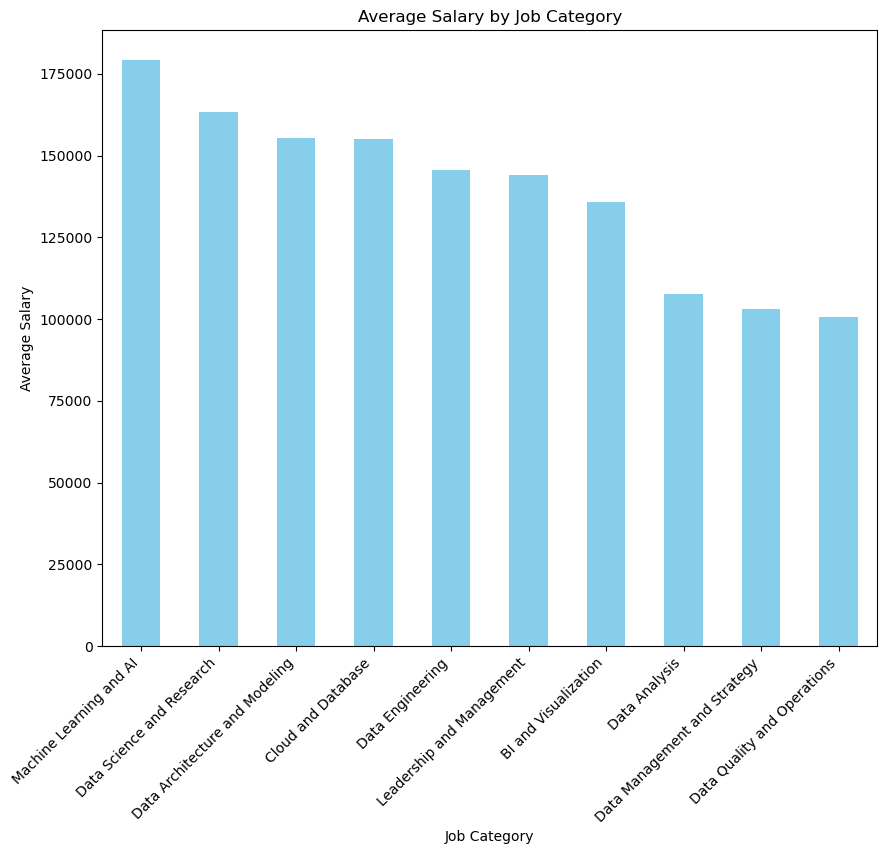

In [20]:
# Group data by 'job_category' and calculate average salary for each category
average_salary_by_category = df.groupby('job_category')['salary'].mean().sort_values(ascending=False)

# Plot the average salary for each job category
plt.figure(figsize=(10, 8))
average_salary_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

### Key Takeaways:
### Highest Paying Categories

The first 2–3 bars represent categories with the highest average salaries — possibly roles like Machine Learning Engineering, Data Science, or AI Research depending on your dataset.

These roles often require advanced technical skills and experience, which contributes to higher compensation.

### Mid-Range Categories

The middle bars show moderately paid roles such as Data Analysis, BI, or Data Engineering.

These roles are still in high demand but might not involve the same level of modeling or innovation.

### Lowest Paying Categories

The last few bars likely correspond to more entry-level, support, or freelance roles, such as Data Entry, Technical Writing, or Internships.

These generally involve less complexity or are part-time/contractual.

# Model Selection & Evaluation

And now we are going to build models to predict the salary according to the features. We are building models to predict salary based on features because it helps individuals benchmark their earnings, plan their careers, negotiate fair compensation, assists organizations in optimizing hiring and compensation strategies, and provides valuable market insights into salary trends within the data science field.

Before building models, we've completed essential data preprocessing steps including:

Encoding Categorical Variables: Converted categorical features into numerical format using techniques like one-hot encoding or label encoding, enabling models to process them effectively.

Feature Scaling: Ensured numerical features are on a similar scale, preventing dominance by features with larger magnitudes and aiding model convergence.

In [26]:
# One- hot encoding of the data before building a model
df = pd.get_dummies(df)

And now, we can start building models and evaluate their performance. 
Let's start by implementing linear regression and random forest regression models for predicting data science salaries. Below is a Python code example using scikit-learn to train and evaluate these models:

### Linear Regression and Random Forest

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(['salary'], axis =1)
y =df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standartization of data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [34]:
#Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

#Random Forest regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
linear_reg_pred = linear_reg_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Mean Squared Error (Linear Regression):", linear_reg_mse)
print("Mean Squared Error (Random Forest):", rf_mse)

Mean Squared Error (Linear Regression): 2.109982917076998e+34
Mean Squared Error (Random Forest): 48299331.85742529


Linear Regression is failing, likely due to poor assumptions or data quality issues.

Random Forest is performing better and giving you a more realistic error.

### XGBBoost with Optuna

And now, let's enhance our XGBoost model using Optuna, a hyperparameter optimization framework. Optuna helps us efficiently search for the best set of hyperparameters, leading to improved model performance.

In [38]:
import optuna
from xgboost import XGBRegressor

def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42
    }
    
    # Initialize XGBRegressor with hyperparameters
    xgb_reg = XGBRegressor(**params)
    xgb_reg.fit(X_train_scaled, y_train)
    
    xgb_pred = xgb_reg.predict(X_test_scaled)
    
    mse = mean_squared_error(xgb_pred, y_test)
    
    return mse

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

best_xgb_reg = XGBRegressor(**best_params, random_state=42)
best_xgb_reg.fit(X_train, y_train)

best_xgb_pred = best_xgb_reg.predict(X_test)

# Evaluate the model
best_xgb_mse = mean_squared_error(best_xgb_pred, y_test)
print("Mean Squared Error (XGBoost with Optuna):", best_xgb_mse)


[I 2025-05-29 22:31:48,280] A new study created in memory with name: no-name-184db30a-da2a-4225-81cc-8a494b2ce8fc
[I 2025-05-29 22:31:48,947] Trial 0 finished with value: 222179424.22625712 and parameters: {'n_estimators': 364, 'learning_rate': 0.1748452834604563, 'max_depth': 4, 'subsample': 0.5720871086929737, 'colsample_bytree': 0.6114537443806938, 'gamma': 1.8928779566288174, 'reg_alpha': 1.1928010857531934, 'reg_lambda': 3.543510130381507}. Best is trial 0 with value: 222179424.22625712.
[I 2025-05-29 22:31:50,487] Trial 1 finished with value: 232887262.98780876 and parameters: {'n_estimators': 779, 'learning_rate': 0.18183397004102975, 'max_depth': 6, 'subsample': 0.7558317198844602, 'colsample_bytree': 0.5104865613225127, 'gamma': 0.7391836844334548, 'reg_alpha': 0.1861643352068887, 'reg_lambda': 3.2707695725089674}. Best is trial 0 with value: 222179424.22625712.
[I 2025-05-29 22:31:51,694] Trial 2 finished with value: 400075905.9585607 and parameters: {'n_estimators': 713, 'le

Best Hyperparameters: {'n_estimators': 565, 'learning_rate': 0.13467807229636003, 'max_depth': 3, 'subsample': 0.9857758955769096, 'colsample_bytree': 0.9666967620752932, 'gamma': 0.019749065032917734, 'reg_alpha': 2.617859559539518, 'reg_lambda': 2.9308750089258075}
Mean Squared Error (XGBoost with Optuna): 23819607.316105586


As we can see the best hyperparameters discovered by Optuna, such as the number of estimators, learning rate, maximum depth of trees, and regularization parameters, contribute to enhancing the model's predictive accuracy. By fine-tuning these hyperparameters, the model can better capture the underlying patterns in the data, resulting in more accurate salary predictions.

With the reduced MSE obtained from the optimized XGBoost model, we can have increased confidence in the model's ability to provide reliable salary predictions, thus empowering individuals and organizations to make more informed decisions related to compensation in the data science domain.

### Conclusion

The hyperparameter tuning using Optuna significantly improved the model’s performance, with the optimized XGBoost regressor achieving a much lower mean squared error (23,819,607) compared to both the linear regression and random forest models, demonstrating that XGBoost, when properly tuned, is highly effective for capturing complex patterns in the data and providing more accurate predictions.

### Overall Conclusion:
In this model-building process, we compared three regression algorithms—Linear Regression, Random Forest, and XGBoost—to predict the target variable. Linear Regression performed poorly due to its inability to capture non-linear relationships and possible issues with data scaling or outliers, resulting in an extremely high mean squared error. Random Forest improved performance significantly by handling non-linearities and reducing sensitivity to outliers. However, the best results were achieved using XGBoost with hyperparameter tuning via Optuna, which further minimized prediction error. This demonstrates that with proper tuning, advanced ensemble models like XGBoost can greatly enhance prediction accuracy and are better suited for complex datasets.

2025-05-29 22:38:23.061 
  command:

    streamlit run C:\Users\benzz\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-29 22:38:23.093 Session state does not function when running a script without `streamlit run`


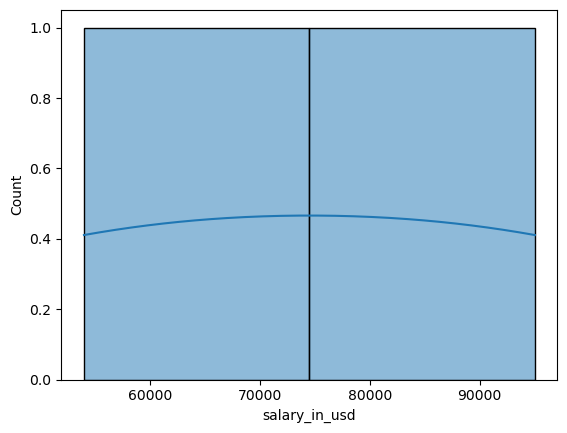

In [43]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
def load_data():
    return pd.read_csv(r"C:\Users\benzz\Downloads\Streamlit\jobs_in_data.csv")

def main():
    st.title("Data Science Salary Analysis")
    df = load_data()

    st.subheader("Raw Data")
    if st.checkbox("Show raw data"):
        st.write(df.head())

    # Example: Filter by job title
    job_titles = df['job_title'].unique()
    selected_job = st.selectbox("Choose a Job Title", job_titles)
    filtered_data = df[df['job_title'] == selected_job]
    st.write(f"Filtered Data for {selected_job}", filtered_data)

    # Salary distribution
    st.subheader("Salary Distribution (USD)")
    fig, ax = plt.subplots()
    sns.histplot(filtered_data['salary_in_usd'], kde=True, ax=ax)
    st.pyplot(fig)

if __name__ == "__main__":
    main()


### Explanation of the Plot
### Histogram:
X-axis: salary_in_usd — the salaries of people with the selected job title.

Y-axis (normalized): Count — in this case, the height has been normalized, so it's between 0 and 1.

The bars show how frequently salary values fall within certain ranges (or bins).

### KDE Curve:
The blue curved line is the KDE — a smoothed version of the histogram that estimates the probability density function of the salary distribution.

It helps you understand the shape of the distribution (e.g., is it normal, skewed, multimodal?).

### Observations:
The KDE curve is nearly flat and symmetric, with a slight bump in the middle.

Salaries appear to be evenly distributed between about 55,000  and  95,000, with no sharp peaks.

This could mean:

Very few unique salary values in the dataset for this specific job title.

Or uniform-like distribution, possibly due to a small number of records.

In [44]:
import os
os.getcwd()


'C:\\Users\\benzz'

In [47]:
os.chdir(r'C:\Users\Benzz\Downloads\Streamlit')

In [49]:
os.listdir()

['app.py', 'jobs_in_data.csv']

In [ ]:
!streamlit run app.py